In [1]:
import numpy as np
import pandas as pd
import re
import os

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
import joblib
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split

import datetime
import json
import plotly.graph_objects as go
import matplotlib
import matplotlib.pyplot as plt
from pylab import mpl
#from pyecharts.charts import Geo
#from pyecharts.charts import Pie , Page , WordCloud
'''
from pyecharts.globals import ThemeType
from pyecharts.globals import SymbolType
import pyecharts.options as opts
'''


import seaborn as sns
from datetime import datetime
import warnings

sns.set_style(
    # 图形风格
    "whitegrid", 
    # 网格默认不显示
    {'axes.grid' : False})

sns.set_context(rc={
    # 标题大小
    'axes.titlesize': 25,
    # 轴的上标题大小
    'axes.labelsize': 20,
    # x轴刻度文字大小
    'xtick.labelsize': 15, 
    # y轴刻度文字大小
    'ytick.labelsize': 15})

plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus'] = False  # 负号正常显示

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('2021VAERSDATA.csv',sep=',', encoding = "ISO-8859-1")
data = data.iloc[::,:35];
data.loc[~data["DIED"].isna() , "DIED"] = "Y"
data["DIED"] = data["DIED"].fillna("N");
def word2vec(path, data): # 生成稀疏矩阵
    if os.path.exists(path):
        cnt_vector = joblib.load(path)
        cnt_tf = cnt_vector.transform(data)
    else:
        cnt_vector = CountVectorizer()
        cnt_tf = cnt_vector.fit_transform(data)
        joblib.dump(cnt_vector, path)
    return cnt_tf

In [4]:
def make_svc(path):
    if os.path.exists(path):
        svm = joblib.load(path)
    else:
        x = get_data_svm(data["VAERS_ID"])
        y = data["DIED"]
        print(len(x) , len(y))
        wordmtx = word2vec('svm_word' , x);
        x_train , x_test , y_train , y_test = train_test_split(wordmtx , y , test_size = 0.2)
        scaler = MaxAbsScaler();
        scaler = scaler.fit(x_train)
        x_train_scaled = scaler.transform(x_train);
        x_test_scaled = scaler.transform(x_test);
        svm = SVC(kernel = 'rbf' , C = 1000 , gamma=0.0001,probability = True).fit(x_train_scaled, y_train);
        print("训练集分数{}".format(svm.score(x_train_scaled , y_train)))
        print("测试集集分数{}".format(svm.score(x_test_scaled , y_test)))
        joblib.dump(svm, path);
    return svm;

In [5]:
def get_data_svm(check):
    tmp_data = pd.read_csv("2021VAERSSYMPTOMS.csv" , encoding = "UTF-8").fillna(" ");
    tmp_data = tmp_data[tmp_data["VAERS_ID"].isin(check)]
    data_column = ["VAERS_ID" , "SYMPTOM1","SYMPTOM2" ,"SYMPTOM3" , "SYMPTOM4", "SYMPTOM5"]
    tmp_data[data_column[1:]] += " ";
    column = tmp_data[data_column].groupby("VAERS_ID").sum()
    Data = column.iloc[:: , 0].str.strip()
    for i in range(1 , len(column.columns)):
        Data = Data +  ' '+ column.iloc[:: ,i].str.strip();
    Data = Data.str.lower()
    return [" ".join(re.split(r"[ ]+",Data.iloc[i]) )for i in range(len(Data) )]

In [6]:
svm = make_svc("svm")
def test(data):
    svm = make_svc("svm");
    data = [i.lower() for i in data]
    print(data)
    x = word2vec('svm_word' , data);
    print(svm.predict(x));
    print(svm.predict_proba(x));
test(["Dysphagia" + " Anxiety" + " Chest discomfort"])

['dysphagia anxiety chest discomfort']
['N']
[[0.93962288 0.06037712]]


In [2]:
tmp_data = pd.read_csv("2021VAERSSYMPTOMS.csv" , encoding = "UTF-8").fillna(" ")
tmp_data["VAERS_ID"]

0         916600
1         916601
2         916602
3         916603
4         916604
          ...   
48105    1113920
48106    1113920
48107    1113963
48108    1115045
48109    1115348
Name: VAERS_ID, Length: 48110, dtype: int64

In [3]:
data = pd.read_csv('2021VAERSDATA.csv',sep=',', encoding = "ISO-8859-1")
data = data.iloc[::,:35];
data.loc[~data["DIED"].isna() , "DIED"] = "Y"
data["DIED"] = data["DIED"].fillna("N")
deaths = data[data["DIED"]=="Y"].index.tolist()
data_death = data.iloc[deaths, :]
data_death_id = data_death["VAERS_ID"].tolist()
data_death_symp = tmp_data[tmp_data["VAERS_ID"].isin(data_death_id)]


s1=data_death_symp['SYMPTOM1'].tolist()
s2=data_death_symp['SYMPTOM2'].tolist()
s3=data_death_symp['SYMPTOM3'].tolist()
s4=data_death_symp['SYMPTOM4'].tolist()
s5=data_death_symp['SYMPTOM5'].tolist()
s11 = s1 + s2
s22 = s3+s4
ss = s11 + s22
s = ss+s5
len(s)

14590

In [30]:
len_v = len(s)
dic_v ={}
for word in s:
    if word not in dic_v:
        dic_v[word] = 1
    else:
        dic_v[word] += 1

dic_v_sort = sorted(dic_v.items(), key=lambda item:item[1], reverse=True)
wordslist,nums =[],[]
for x,y in dic_v_sort:
    wordslist.append(x)
    nums.append(y)
"""
del wordslist[0]
del wordslist[0]
del nums[0]
del nums[0]
"""


'\ndel wordslist[0]\ndel wordslist[0]\ndel nums[0]\ndel nums[0]\n'

In [41]:
wordslist

['Dyspnoea',
 'SARS-CoV-2 test positive',
 'Pyrexia',
 'Fatigue',
 'Vomiting',
 'Asthenia',
 'Nausea',
 'Pulse absent',
 'Decreased appetite',
 'Syncope',
 'General physical health deterioration',
 'Pneumonia',
 'Cough',
 'Oxygen saturation decreased',
 'Pain',
 'Blood creatinine increased',
 'Cardio-respiratory arrest',
 'Headache',
 'Hypotension',
 'Myocardial infarction',
 'Lethargy',
 'Sudden death',
 'Hypoxia',
 'Chest X-ray abnormal',
 'Cerebrovascular accident',
 'Blood urea increased',
 'Intensive care',
 'Autopsy',
 'Chills',
 'White blood cell count increased',
 'Diarrhoea',
 'Loss of consciousness',
 'Chest pain',
 'Respiratory failure',
 'Pulseless electrical activity',
 'Full blood count',
 'Mechanical ventilation',
 'Pain in extremity',
 'Confusional state',
 'Haemoglobin decreased',
 'COVID-19 pneumonia',
 'Dizziness',
 'Feeling abnormal',
 'Metabolic function test',
 'Cardiac failure congestive',
 'Mental status changes',
 'Sepsis',
 'Dysphagia',
 'Blood glucose increas

In [32]:
del wordslist[0]
del wordslist[0]
del nums[0]
del nums[0]

In [33]:
del wordslist[1]

del wordslist[1]

del wordslist[1]
del nums[1]
del nums[1]

del nums[1]

In [34]:
del wordslist[2]
del nums[2]

In [36]:
del wordslist[6]
del nums[6]

In [38]:
del wordslist[8]
del nums[8]
del wordslist[8]
del nums[8]
del wordslist[8]
del nums[8]
del wordslist[8]
del nums[8]

In [40]:
del wordslist[9]
del nums[9]

In [76]:
from pyecharts.charts.wordcloud import WordCloud
v_WordCloud = WordCloud("死亡患者生前发生的不良反应",width=1000, height=600)
v_WordCloud.add("",wordslist,nums,word_size_range=[20,100])

In [42]:
dic_deathsym = {"sym":wordslist[0:10],"frequency":nums[0:10]}
deathsym = pd.DataFrame(dic_deathsym)
deathsym

,sym,frequency
0,Dyspnoea,206
1,SARS-CoV-2 test positive,123
2,Pyrexia,106
3,Fatigue,97
4,Vomiting,96
5,Asthenia,92
6,Nausea,82
7,Pulse absent,79
8,Decreased appetite,65
9,Syncope,62


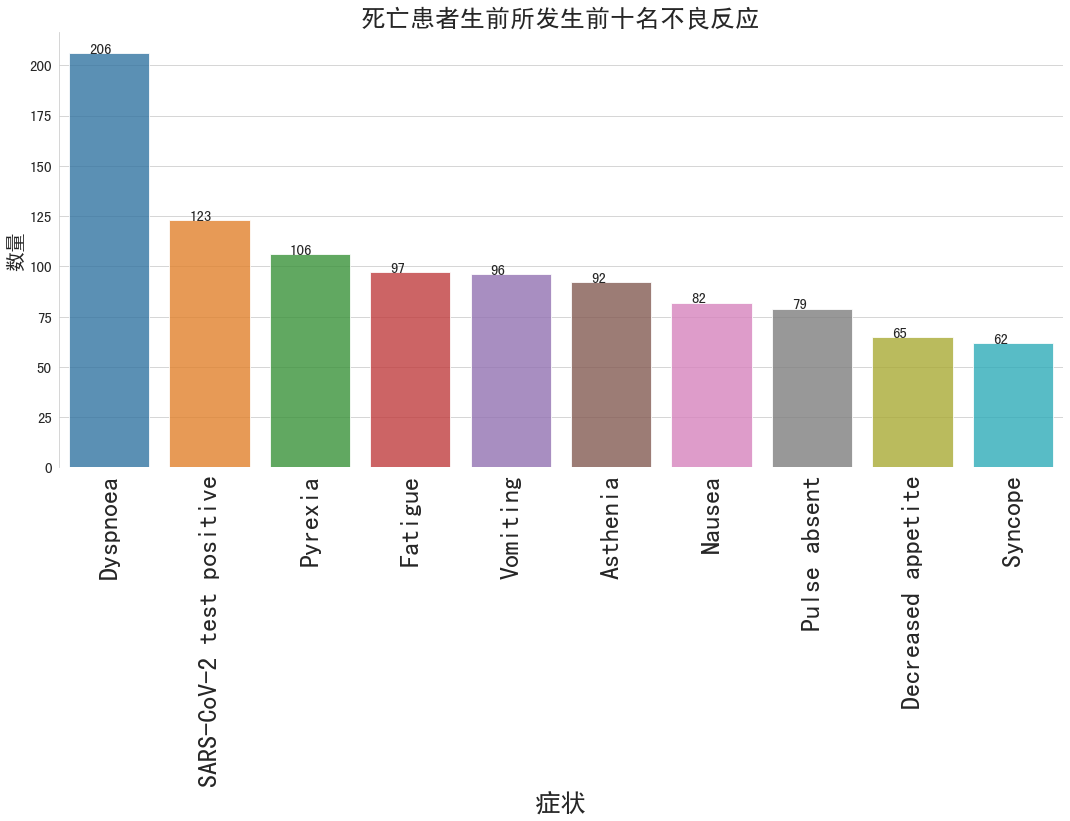

In [43]:
plt.figure(figsize=(18, 8))
sns.barplot(x='sym', y='frequency', data=deathsym, alpha=0.8)

# 同时去掉底部边框
sns.despine(bottom=True)
plt.grid(axis='y')
#调整xy轴字体大小
plt.xticks(rotation=90)
plt.xticks(fontsize=26)
plt.yticks(fontsize=15)
plt.xlabel('症状',fontsize=26)
plt.ylabel('数量',fontsize=20)
plt.title('死亡患者生前所发生前十名不良反应',fontsize=25)

for i in range(10):
    plt.text(i-0.2,deathsym.iloc[i,1]+0.01,round(deathsym.iloc[i,1],2),fontsize = 15)
    
plt.savefig('死亡患者生前所发生前十名不良反应.jpg')